In [ ]:
SMS_Spam_Detection

In [1]:
# Importing dataset 
import pandas as pd 
import numpy as np

# saving the dataset in the variable df 
data = pd.read_csv("SMSSpamCollection", sep='\t', names=['Labels' , 'Messages'])


In [2]:
# Here we can see our dataset 
data

,Labels,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
# getting all the information about dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Labels    5572 non-null   object
 1   Messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
# checking the null values 
data.isnull().sum()

Labels      0
Messages    0
dtype: int64

In [5]:
# gettng the description of the dataset 
data.describe()

,Labels,Messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
# let's map the features in labels column 
# Mapping spam with 1 and ham with 0

data['Labels'] = data['Labels'].map({'spam' : 1 , 'ham' : 0 })

In [7]:
# Now here we can see that we have converted all the text like 
# ham = 0 and spam = 1 in numerical form 

data

,Labels,Messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


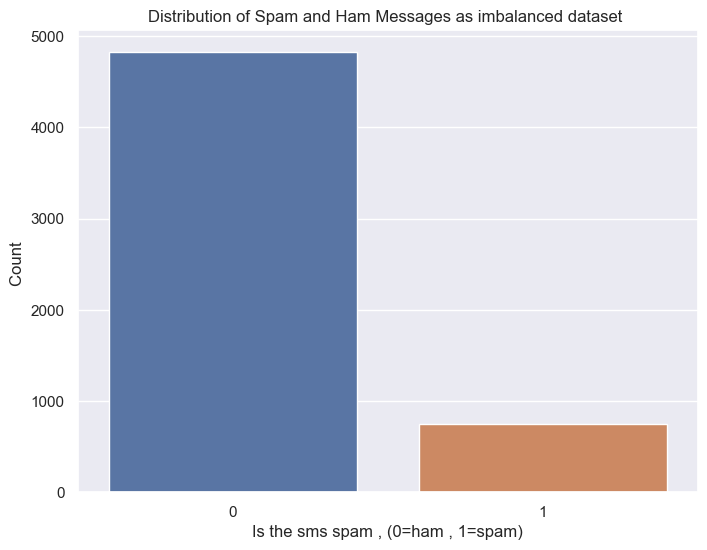

In [8]:
# To visualize the dataset 
# using countplot to indentify count between spam and ham 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'data' with a 'labels' column that contains 'spam' or 'ham'
# Example DataFrame:
# data = pd.read_csv("SMSSpamCollection.csv", sep='\t', header=None)
# data.columns = ['label', 'message']

# Create a countplot
sns.set(style="darkgrid") # ---> Just setting style for countplot
plt.figure(figsize=(8, 6)) # --> setting figuresize 
sns.countplot(data=data, x='Labels') # --> Here putting real dataset and colum

# Add labels and a title
plt.xlabel('Is the sms spam , (0=ham , 1=spam)')
plt.ylabel('Count ')
plt.title('Distribution of Spam and Ham Messages as imbalanced dataset ')

# Show the plot
plt.show()


In [9]:
# when there is very high difference between positive and 
# negative value at that we called the dataset as imbalanced dataset 

In [10]:
# Handling Imbalanced dataset using oversampling 
only_spams = data[data['Labels'] == 1 ]

In [11]:
# Here we can se how we have only data which have spam values 
only_spams

,Labels,Messages
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [12]:
print("len of spam massages" , len(only_spams))
print("len of ham massages" , len(data) - len(only_spams))

len of spam massages 747
len of ham massages 4825


In [13]:
count = 4825 / 747

In [14]:
count

6.459170013386881

In [15]:
# after rounding it 
count2 = round(count)

In [16]:
count2

6

In [17]:
# So to hanlde imbalanced dataset we need to
# replicate the number of spam massages by 6 times 

# --> this is just to get the positive and negative values 
# in same range or near to each other 

for i in range(0,count2-1) :
    data = pd.concat([data , only_spams])
#   concatanating dataset with only_spams 6 times 

# when we have imbalanced dataset we generally need to do this above 
# transformation to train our machine learning model in better way 
# also it is important to get learn the data patterns from dataset 
# for machine learning model 

In [18]:
data.shape

(9307, 2)

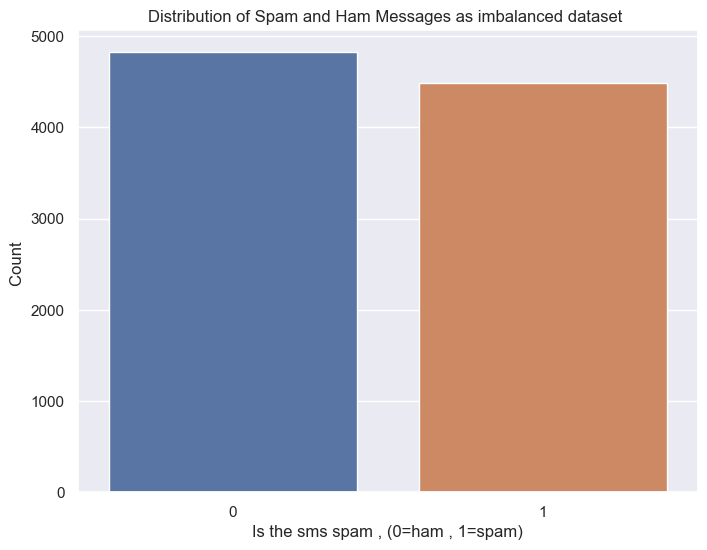

In [19]:
# Now here we can see that now we have positive 
# and negative values count near to each other 

# To visualize the dataset 
# using countplot to indentify count between spam and ham 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'data' with a 'labels' column that contains 'spam' or 'ham'
# Example DataFrame:
# data = pd.read_csv("SMSSpamCollection.csv", sep='\t', header=None)
# data.columns = ['label', 'message']

# Create a countplot
sns.set(style="darkgrid") # ---> Just setting style for countplot
plt.figure(figsize=(8, 6)) # --> setting figuresize 
sns.countplot(data=data, x='Labels') # --> Here putting real dataset and colum

# Add labels and a title
plt.xlabel('Is the sms spam , (0=ham , 1=spam)')
plt.ylabel('Count ')
plt.title('Distribution of Spam and Ham Messages as imbalanced dataset ')

# Show the plot
plt.show()

In [20]:
# creating a new feature called word_count 
data['word_count'] = data["Messages"].apply(lambda x : len(x.split()))

In [21]:
# Here you can see that we have created the column 
# called word_count which contain the lenth of the 
# words in messeges column with respect to the every row 
data

,Labels,Messages,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


In [22]:
# getting the word count of each row in which labels = 0 
ham_word_count = data[data['Labels'] == 0 ].word_count

In [23]:
# getting the word count of each row in which labels = 1 
spam_word_count = data[data['Labels'] == 1 ].word_count

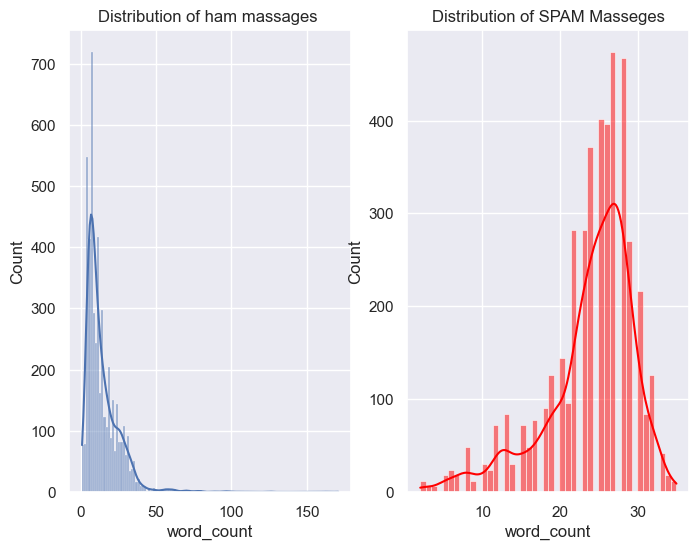

In [24]:
plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
sns.histplot(data=ham_word_count ,  kde = True )
plt.title("Distribution of ham massages ")

plt.subplot(1,2,2)
sns.histplot(data=spam_word_count , color = 'red' , kde = True )
plt.title("Distribution of SPAM Masseges")

plt.show()

In [25]:
# Creating the function to get occurence of the currency symbols
# from the dataset

def contain_currency_symbol(data) :
    currency_symbols = ['$' , '€' , '¥' , '£' , '₹ ']
    for i in currency_symbols :
        if i in data :
            return 1 
    return 0 
    

In [26]:
# creating the column which contain the presense of the currency 
# if contain_currency_symbol == 1 , then yes this is the presense of currency symbol
# if contain_currency_symbol == 0 , then yes this is the absense of currency symbol

data['contain_currency_symbol'] = data['Messages'].apply(contain_currency_symbol)

In [27]:
# Here we have created new column called 'contain_currency_symbol' 
data['contain_currency_symbol']

0       0
1       0
2       0
3       0
4       0
       ..
5537    0
5540    1
5547    0
5566    0
5567    1
Name: contain_currency_symbol, Length: 9307, dtype: int64

In [28]:
data

,Labels,Messages,word_count,contain_currency_symbol
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


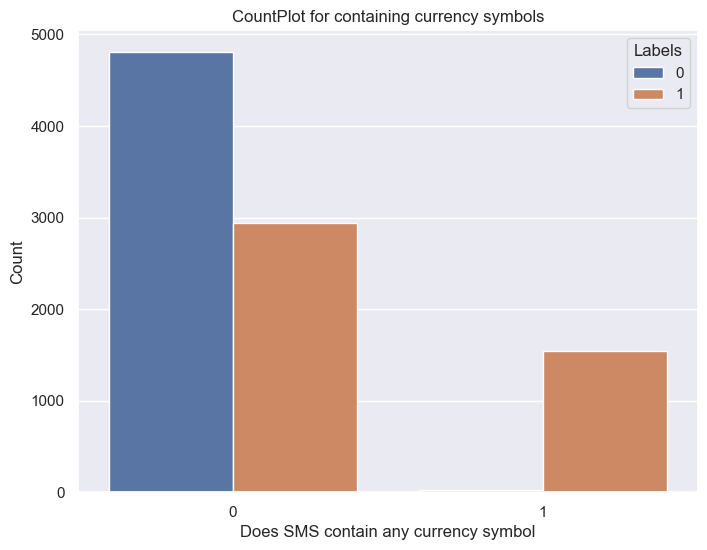

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a countplot with two variables
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='contain_currency_symbol' , hue = "Labels")

# Add labels and a title
plt.xlabel('Does SMS contain any currency symbol')
plt.ylabel('Count')
plt.title('CountPlot for containing currency symbols')

# Show the plot
plt.show()


In [30]:
def check_numbers(data) :
    list_of_numbers = ['0' , '1' , '2' , '3' , '4' , '5' , '6' , '7' , '8' , '9']
    for i in list_of_numbers :
        if i in data :
            return 1 
    return 0 

In [31]:
# Creating a new column called contain numbers 
data['contain_numbers'] = data['Messages'].apply(check_numbers)

In [32]:
data

,Labels,Messages,word_count,contain_currency_symbol,contain_numbers
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


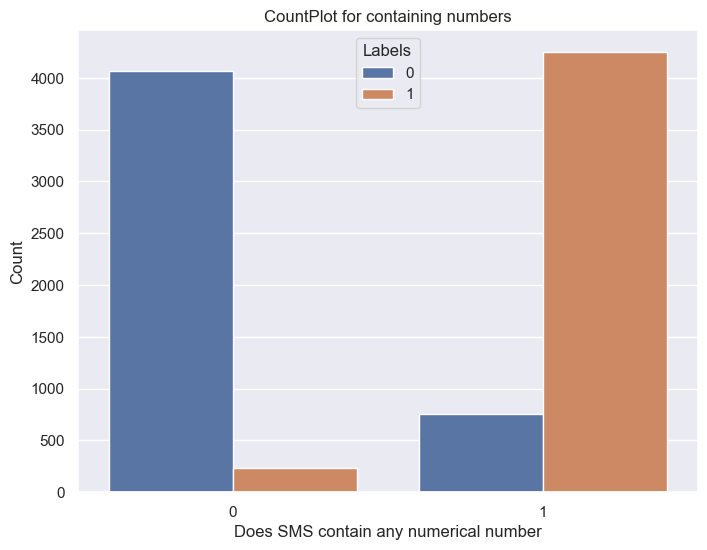

In [33]:
# Countplot to check that how many numbers are contain ham and spam massages 
import seaborn as sns
import matplotlib.pyplot as plt


# Create a countplot with two variables
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='contain_numbers' , hue = "Labels")

# Add labels and a title
plt.xlabel('Does SMS contain any numerical number')
plt.ylabel('Count')
plt.title('CountPlot for containing numbers')

# Show the plot
plt.show()


In [34]:
# Let's start data cleaning 
import nltk
nltk.download('omw-1.4')
import nltk # --> nltk / Tokenization splits a sentence into individual words or tokens.
import re # --> Removing special characters and non-alphanumeric characters.
from nltk.corpus import stopwords # --> generally used to remove stopwords like 'is' , 'of' 'an' etc
from nltk.stem import WordNetLemmatizer # --> to add some specific limit to the word like words = word , moods = mood
wnl = WordNetLemmatizer() # --> creating the object of the WordNetLemmatizer
corpus = []

for sms in list(data.Messages) :
    message = re.sub( pattern = '[^a-zA-Z]' , repl = ' ' , string = sms ) 
    # --> This is generally using to capture things which we wants to capture from the text data 
    
    message = message.lower()
    splitted_words = message.split()
    filtered_words = [word for word in splitted_words if word not in set(stopwords.words('english'))]
    lemmatize_words = [wnl.lemmatize(word) for word in filtered_words]
    cleaned_messages = " ".join(lemmatize_words)
    
    corpus.append(cleaned_messages)
  

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mahen\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [36]:
# Here we can see that we have cleaned our messages
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [ ]:
# The TfidfVectorizer is a tool used in natural language processing 
# and text analysis to convert a collection of text documents into 
# numerical vectors

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features = 500)

# Fit the vectorizer on your text data and transform the text documents into TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus).toarray()

# Get the feature (word) names
feature_names = tfidf_vectorizer.get_feature_names_out()

In [43]:
# Independent and dependent features 
X = pd.DataFrame(tfidf_matrix , columns = feature_names )
Y = data['Labels']

In [44]:
# Independent Features 
X

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.4117,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9302,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9303,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.326017,0.0,0.0,0.0,0.0,0.0
9304,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.287064,0.0,0.0,0.0,0.0,0.0
9305,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [45]:
# Dependent Features 
Y

0       0
1       0
2       1
3       0
4       0
       ..
5537    1
5540    1
5547    1
5566    1
5567    1
Name: Labels, Length: 9307, dtype: int64

In [48]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix  

# doing train_test_split 
X_train , X_test , y_train , y_test = train_test_split(X,Y ,  test_size = 0.33 , random_state = 123 )

In [49]:
# # Test dataset with respected to dependent features
X_train

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
2674,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1247,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7947,0.0,0.0,0.0,0.407276,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
626,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4097,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7382,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7763,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5218,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1346,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# Training dataset respected to dependent features 
y_train

2674    0
1247    0
869     1
626     0
4097    0
       ..
2290    1
5147    1
5218    0
1346    0
3582    0
Name: Labels, Length: 6235, dtype: int64

In [51]:
# Test dataset with respected to independent features 
X_test

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
7548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# Test dataset with respected to independent features 
y_test

3595    1
3266    1
3456    0
798     0
1119    0
       ..
1985    1
1650    0
1430    1
3368    0
2525    1
Name: Labels, Length: 3072, dtype: int64

In [55]:
# Trainig Nive baiyes model 
from sklearn.naive_bayes import MultinomialNB 
nvb = MultinomialNB ()
cv = cross_val_score(nvb , X , Y , scoring = 'f1' , cv = 10 )

# printting standard deviation and model score 
print("Model score -->" , round(cv.mean(), 3))
print("standard deviation -->" , round(cv.std(),3))

Model score --> 0.943
standard deviation --> 0.004


In [59]:
# Training model using training datasets 
nvb.fit(X_train , y_train)

# getting prediction using test dataset 
y_predict = nvb.predict(X_test)

In [62]:
# Printing classification matrix 
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1604
           1       0.94      0.94      0.94      1468

    accuracy                           0.94      3072
   macro avg       0.94      0.94      0.94      3072
weighted avg       0.94      0.94      0.94      3072



In [64]:
# Calculating confusion matrix 
cm = confusion_matrix(y_test , y_predict)

In [65]:
cm

array([[1515,   89],
       [  92, 1376]], dtype=int64)

In [67]:
plt.figure(figsize=(8,9))
sns.heatmap(data=cm)

<Figure size 800x900 with 0 Axes>

<Figure size 800x900 with 0 Axes>

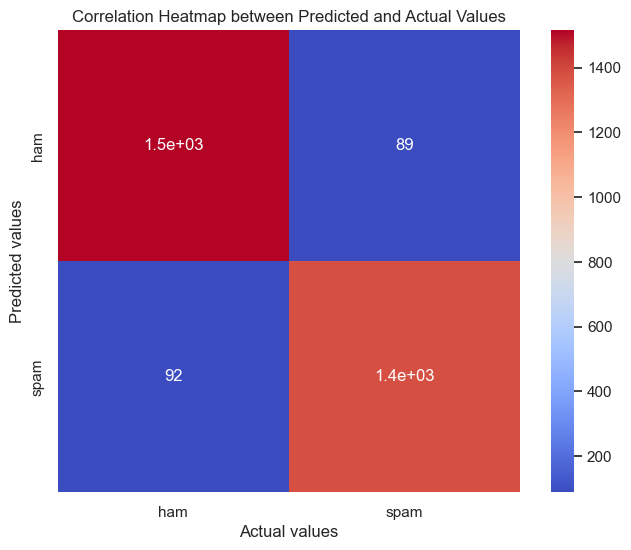

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', square=True, cbar=True, xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title("Correlation Heatmap between Predicted and Actual Values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()


In [71]:
# Training the decision tree model 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() # --> creating the object of DecisionTreeClassifier to train our model 

cv1 = cross_val_score(dt , X , Y , scoring = 'f1' , cv = 10 )

# printting standard deviation and model score 
print("Model score -->" , round(cv1.mean(), 3))
print("standard deviation -->" , round(cv1.std(),3))

Model score --> 0.979
standard deviation --> 0.004


In [73]:
# Training the decision tree model using training dataset 
dt.fit(X_train , y_train)
y_predict1 = dt.predict(X_test) # --> getting prediction using test dataset

In [75]:
# Printing classification matrix using predicted dataset which is trained by decision tree model 
print(classification_report(y_test , y_predict1))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1604
           1       0.96      1.00      0.98      1468

    accuracy                           0.98      3072
   macro avg       0.98      0.98      0.98      3072
weighted avg       0.98      0.98      0.98      3072



In [78]:
# Calculating confusion matrix using predicted dataset which is trained by decision tree model 
cm1 = confusion_matrix(y_test , y_predict1)
cm1

array([[1547,   57],
       [   6, 1462]], dtype=int64)

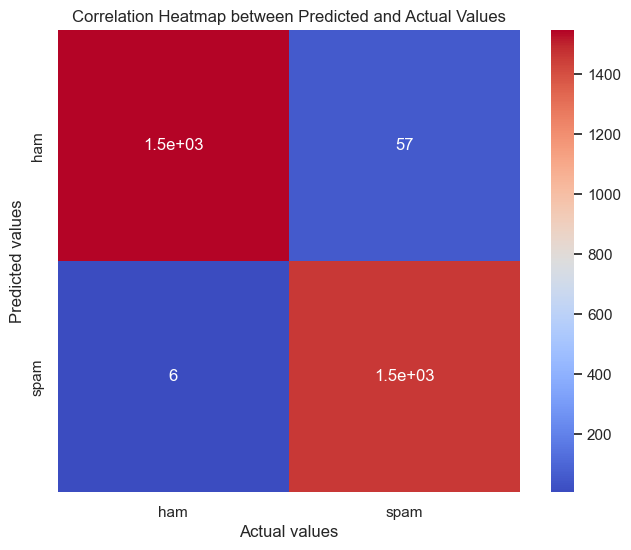

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, cmap='coolwarm', square=True, cbar=True, xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title("Correlation Heatmap between Predicted and Actual Values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()


In [82]:
# Creating the function to predict whether the message is spam or ham 
def Predict_spam(sms) :
    message = re.sub( pattern = '[^a-zA-Z]' , repl = ' ' , string = sms ) 
    # --> This is generally using to capture things which we wants to capture from the text data 
    
    message = message.lower()
    splitted_words = message.split()
    filtered_words = [word for word in splitted_words if word not in set(stopwords.words('english'))]
    lemmatize_words = [wnl.lemmatize(word) for word in filtered_words]
    cleaned_messages = " ".join(lemmatize_words)
    
    temp = tfidf_vectorizer.transform([cleaned_messages]).toarray()
    
    # using decision_tree model to predict message 
    return dt.predict(temp)
    

In [83]:
# checking the meassage whether it is spam or ham 
sample_message = "Congratulations! You've won a $1,000 gift card. Claim it now by clicking this link: http://example.com/win-gift"


if Predict_spam(sample_message) :
    print("This is spam massage")
else :
    print("This is not spam massage")
    

This is spam massage


C:\Users\mahen\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [84]:
sample_message2 = "Hi there! Just checking in to see if you're available for our team meeting tomorrow at 10 AM. Please let me know. Thanks!"

if Predict_spam(sample_message2) :
    print("This is spam massage")
else :
    print("This is not spam massage")

This is not spam massage


C:\Users\mahen\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
